# Ejercicio de machine learning: clasificación y regresión vinícola

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

###  1. Librerías necesarias.

Las librerías que utilizaremos en este documento son las siguientes:


In [1]:
# Tratamiento de datos
#-----------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
#-----------------------------------------------------------------
%matplotlib inline 
#para que incruste la imagen en el notebook
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocesado y modelado
#-----------------------------------------------------------------
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error


# Gestión de archivos
#-----------------------------------------------------------------
import pickle



# 2. Carga de los datos y análisis exploratorio.

## 2.1. Carga del archivo y limpieza de datos.


En primer lugar cargaremos el fichero en nuestro notebook utilizando la función de pandas read_csv. Hay que tener en cuenta que el archivo está en el mismo directorio que el notebook y que los datos van separados por un punto y coma.


In [2]:
ARCHIVO='winequality.csv'

vinos=pd.read_csv(ARCHIVO,sep=';')


In [3]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Tenemos un archivo con 13 variables y 6.497 observaciones. Hay 12 variables numéricas y una tipo object que es el color. No se observa ningún valor nulo.

A continuación comprobamos si hay **valores duplicados**.

In [4]:
vinos[vinos.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
264,6.6,0.200,0.27,10.9,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,7,white
324,5.2,0.155,0.33,1.6,0.028,13.0,59.0,0.98975,3.30,0.84,11.9,8,white
382,7.7,0.390,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7,white
392,7.2,0.310,0.35,7.2,0.046,45.0,178.0,0.99550,3.14,0.53,9.7,5,white
415,6.8,0.220,0.35,17.5,0.039,38.0,153.0,0.99940,3.24,0.42,9.0,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,6.7,0.410,0.34,9.2,0.049,29.0,150.0,0.99680,3.22,0.51,9.1,5,white
6488,6.9,0.150,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8,white
6489,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.2,6,white
6491,6.8,0.270,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


Y los eliminamos.

In [5]:
# Eliminación de observaciones duplicadas.
#---------------------------------------------------------------------------
vinos.drop_duplicates(inplace=True,ignore_index=True)


In [6]:
vinos.shape

(5320, 13)

Hemos limpiado las 1.177 observaciones duplicadas que teníamos en nuestro dataset.



## 2.2 Análisis exploratorio.

 
Ahora vamos a ver como son nuestros datos. 

In [7]:
# Empleo la función describe para ver los principales valores estadísticos de las variables. 
#-----------------------------------------------------------------------------------------------
vinos.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Y que aspecto tienen las distribuciones de nuestras variables.

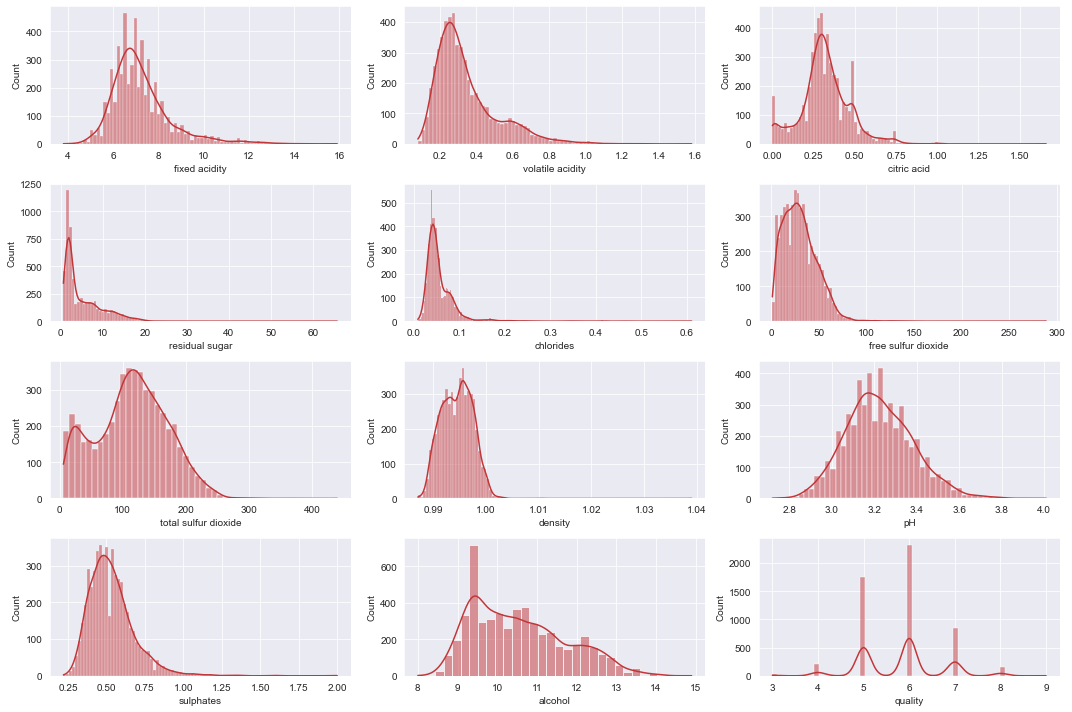

In [10]:

# Representación gráfica histogramas con (kde) de las features numéricas
#---------------------------------------------------------------------------
filas=4
columnas=3
fig, axes = plt.subplots(filas, columnas, figsize=(15, 10),tight_layout=True)
sns.set_style("darkgrid")
sns.set_palette('RdGy')
for i in range(filas):
    for j in range(columnas):
        var=(+j)+(i*columnas)
        sns.histplot(ax=axes[i, j], data=vinos,  x=vinos.columns[var],kde=True,alpha=0.5)
        

Observando la distribución de valores de la la variable **acid_citric**, se observa una concentración inusual de observaciones (136) con un valor igual a cero. 

Este dato no tiene sentido físico. Este valor podría deberse que el método de análisis del ácido cítrico no fuese suficientemente sensible y no detectase valores inferiores a 0.01. 

Aunque también podría ocurrir que son valores que no se han informado en nuestro dataframe. 

Para depejar dudas, comparamos la distribución por clases de vinos con ácido cítrico igual a cero con la del dataframe original:


In [11]:
print('\n Distribución de clases de vino con ácido cítrico igual a cero:\n','\n',
        vinos.loc[vinos['citric acid']==0,['color']].value_counts(normalize=True))

print('\n Distribución de clases de vino en el conjunto de datos: \n','\n',
        vinos['color'].value_counts(normalize=True))


 Distribución de clases de vino con ácido cítrico igual a cero:
 
 color
red      0.867647
white    0.132353
dtype: float64

 Distribución de clases de vino en el conjunto de datos: 
 
 white    0.744549
red      0.255451
Name: color, dtype: float64



Tal como suponíamos la distribución por clases es diferente para el dataframe que para el conjunto de observaciones con ácido cítrico igual a cero. 

Como veremos más adelante los vinos tintos tienen tendencia a tener concentraciones inferiores de ácido cítrico. Por lo tanto vamos a **asumir que esos valores igual a cero son reales** y no los imputaremos como missing. 



### Distribución por clases.

Estamos trabajando con un dataframe desbalanceado. con un 74,4% de observaciones de la clase vino blanco y un 25,6% de vino tinto.

Vamos a ver como se distribuyen las variables según la clase a la que pertenecen.

In [12]:
print('\n Valores estadísticos de vinos rojos')
vinos[vinos['color']=='red'].describe()


 Valores estadísticos de vinos rojos


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
print('\n Valores estadísticos de vinos blancos')
vinos[vinos['color']=='white'].describe()


 Valores estadísticos de vinos blancos


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


O de una forma más visual:

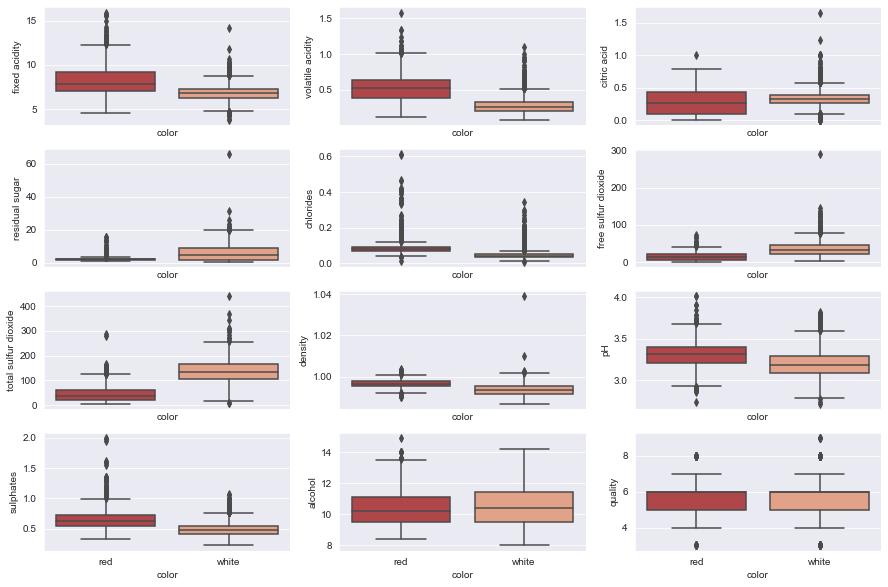

In [14]:

# Gráfico boxplot de las features numéricas separados por clase
#---------------------------------------------------------------------------
filas=4
columnas=3
fig, axes = plt.subplots(filas, columnas, figsize=(15, 10),sharex=True)
sns.set_style("darkgrid")
sns.set_palette('RdGy')
for i in range(filas):
    for j in range(columnas):
        var=(+j)+(i*columnas)
        sns.boxplot(ax=axes[i, j], data=vinos, x='color', y=vinos.columns[var])


Como se puede apreciar en la figura los vinos rojos suelen tener algo más de acidez (tanto en compuestos volátiles como fija), además se ve una tendencia a que los vinos rojos presenten mayores cantidades de sales en forma de cloruros y sufatos. 

Los vinos blancos suelen tener mayores cantidades de azucares residuales y mayores cantidades de dioxido de azufre, tanto libre como total.

### Correlación de variables.

Vamos a analizar a continuación la correlación entre las diferentes variables. Para ello dibujaremos una matriz de correlación sobre un mapa de calor.

<AxesSubplot:>

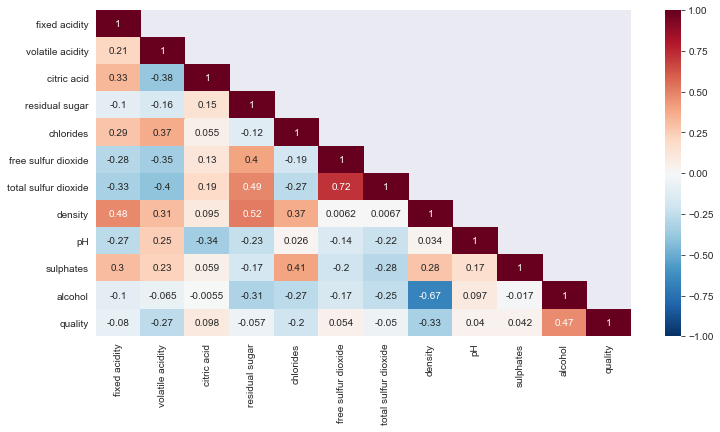

In [15]:

# Matriz de correlación de las variables numéricas
#---------------------------------------------------------------------------
fig, axes = plt.subplots(figsize=(12, 6))

sns.heatmap(vinos.corr(),
           vmin=-1.0,
           vmax=1.0,
           annot=True,
           mask=np.tri(12,12,k=-1,dtype=bool).T,
           cmap='RdBu_r')

Por último, vamos aver una serie de gráficos de dispersión entre tres gurpos de variables asociadas por su correlación.

1. **pH, residual sugar, free sulfur dioxide, total sulfor dioxide, fixed acidity, volatile acidity y color.**

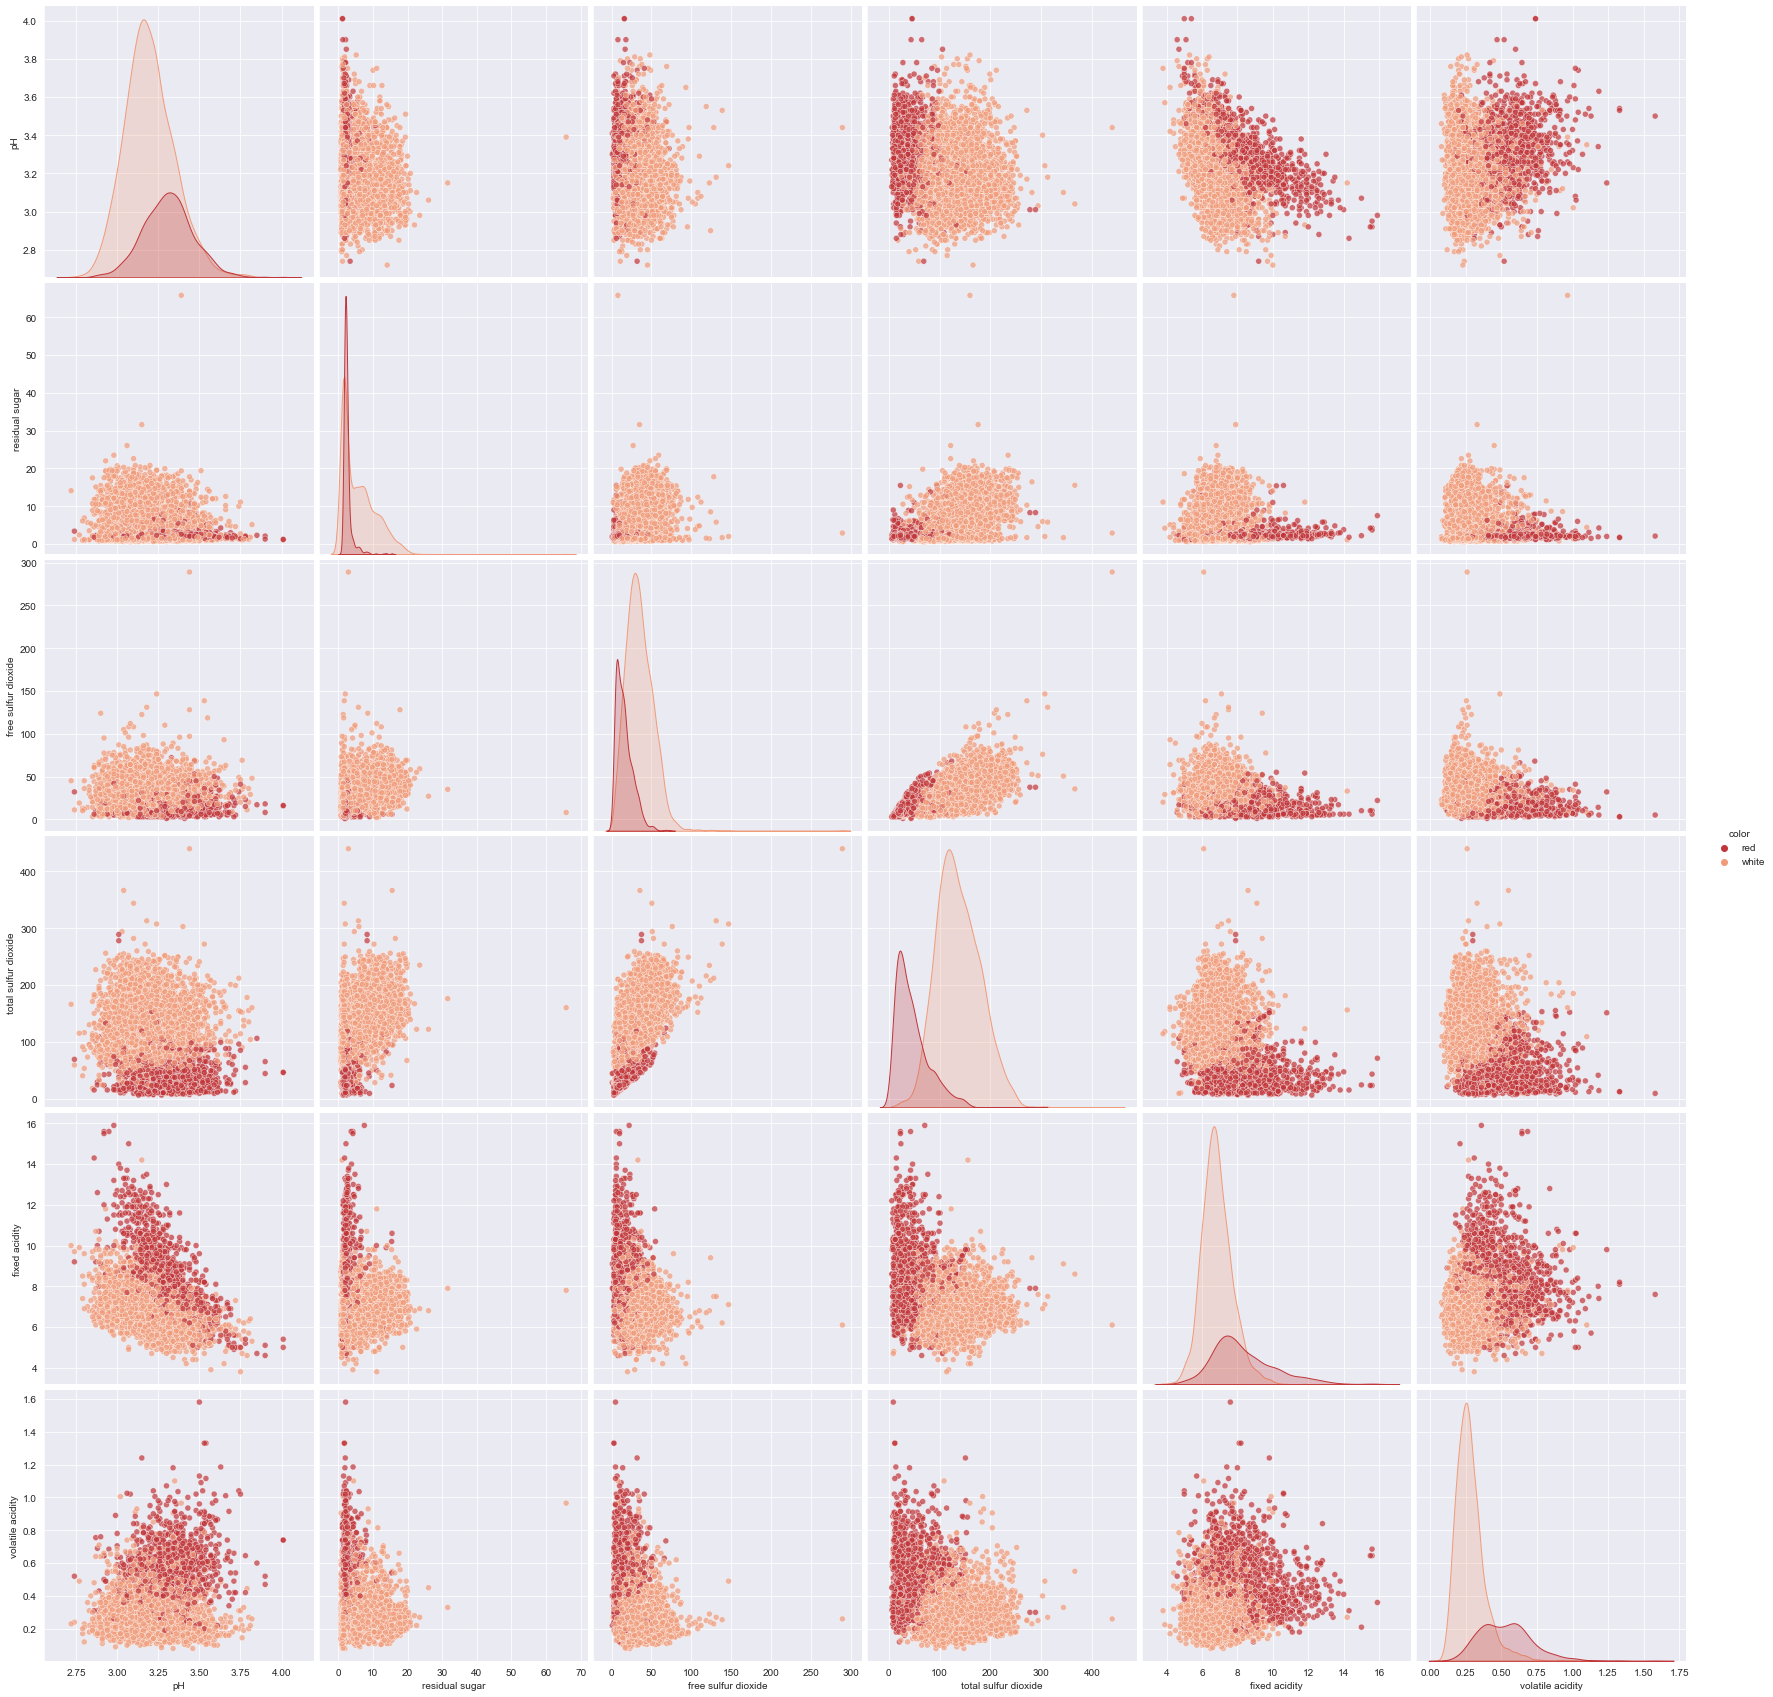

In [16]:

# Gráficos de dispersión de variables correlacionadas con pH
#---------------------------------------------------------------------------

sns.pairplot(vinos[['pH','residual sugar','free sulfur dioxide','total sulfur dioxide','fixed acidity',
                    'volatile acidity','color']],
            hue='color',
            height=4,
            plot_kws={'alpha':0.7}
            )

2. **Density, residual sugar, chlorides, sulphates, fixed acidity, alcohol y color.**

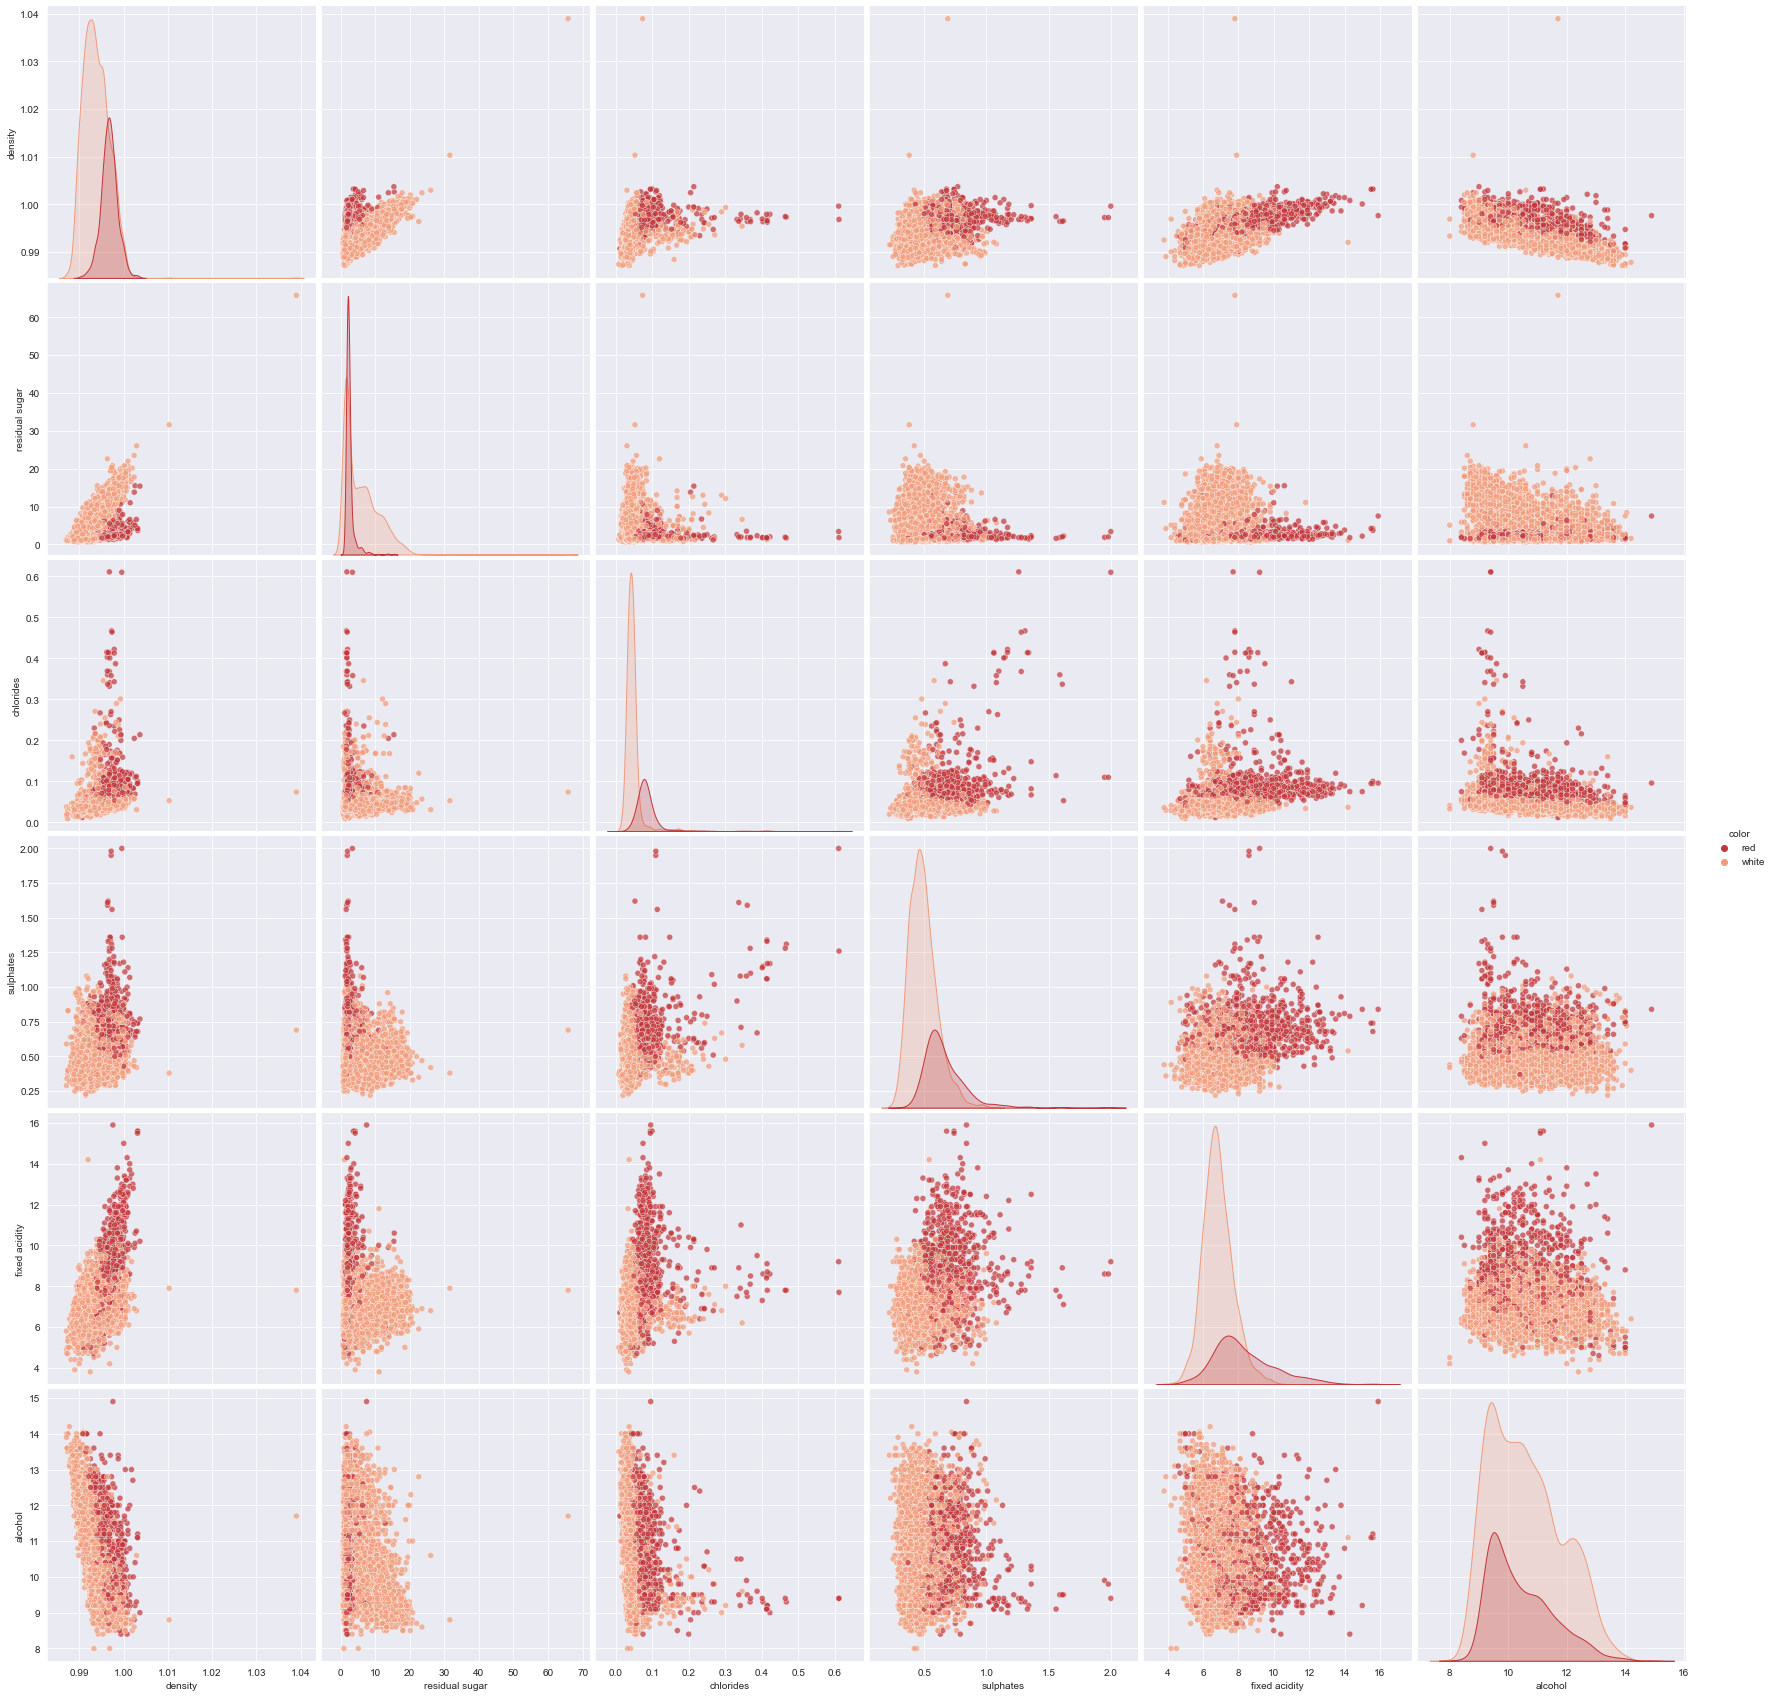

In [17]:

# Gráficos de dispersión de variables correlacionadas con densidad
#---------------------------------------------------------------------------
sns.pairplot(vinos[['density','residual sugar','chlorides','sulphates','fixed acidity','alcohol','color']],
            hue='color',
            height=4,
            plot_kws={'alpha':0.7}
            )

3. **Quality, alcohol, density, chlorides, volatile acidity y color.**

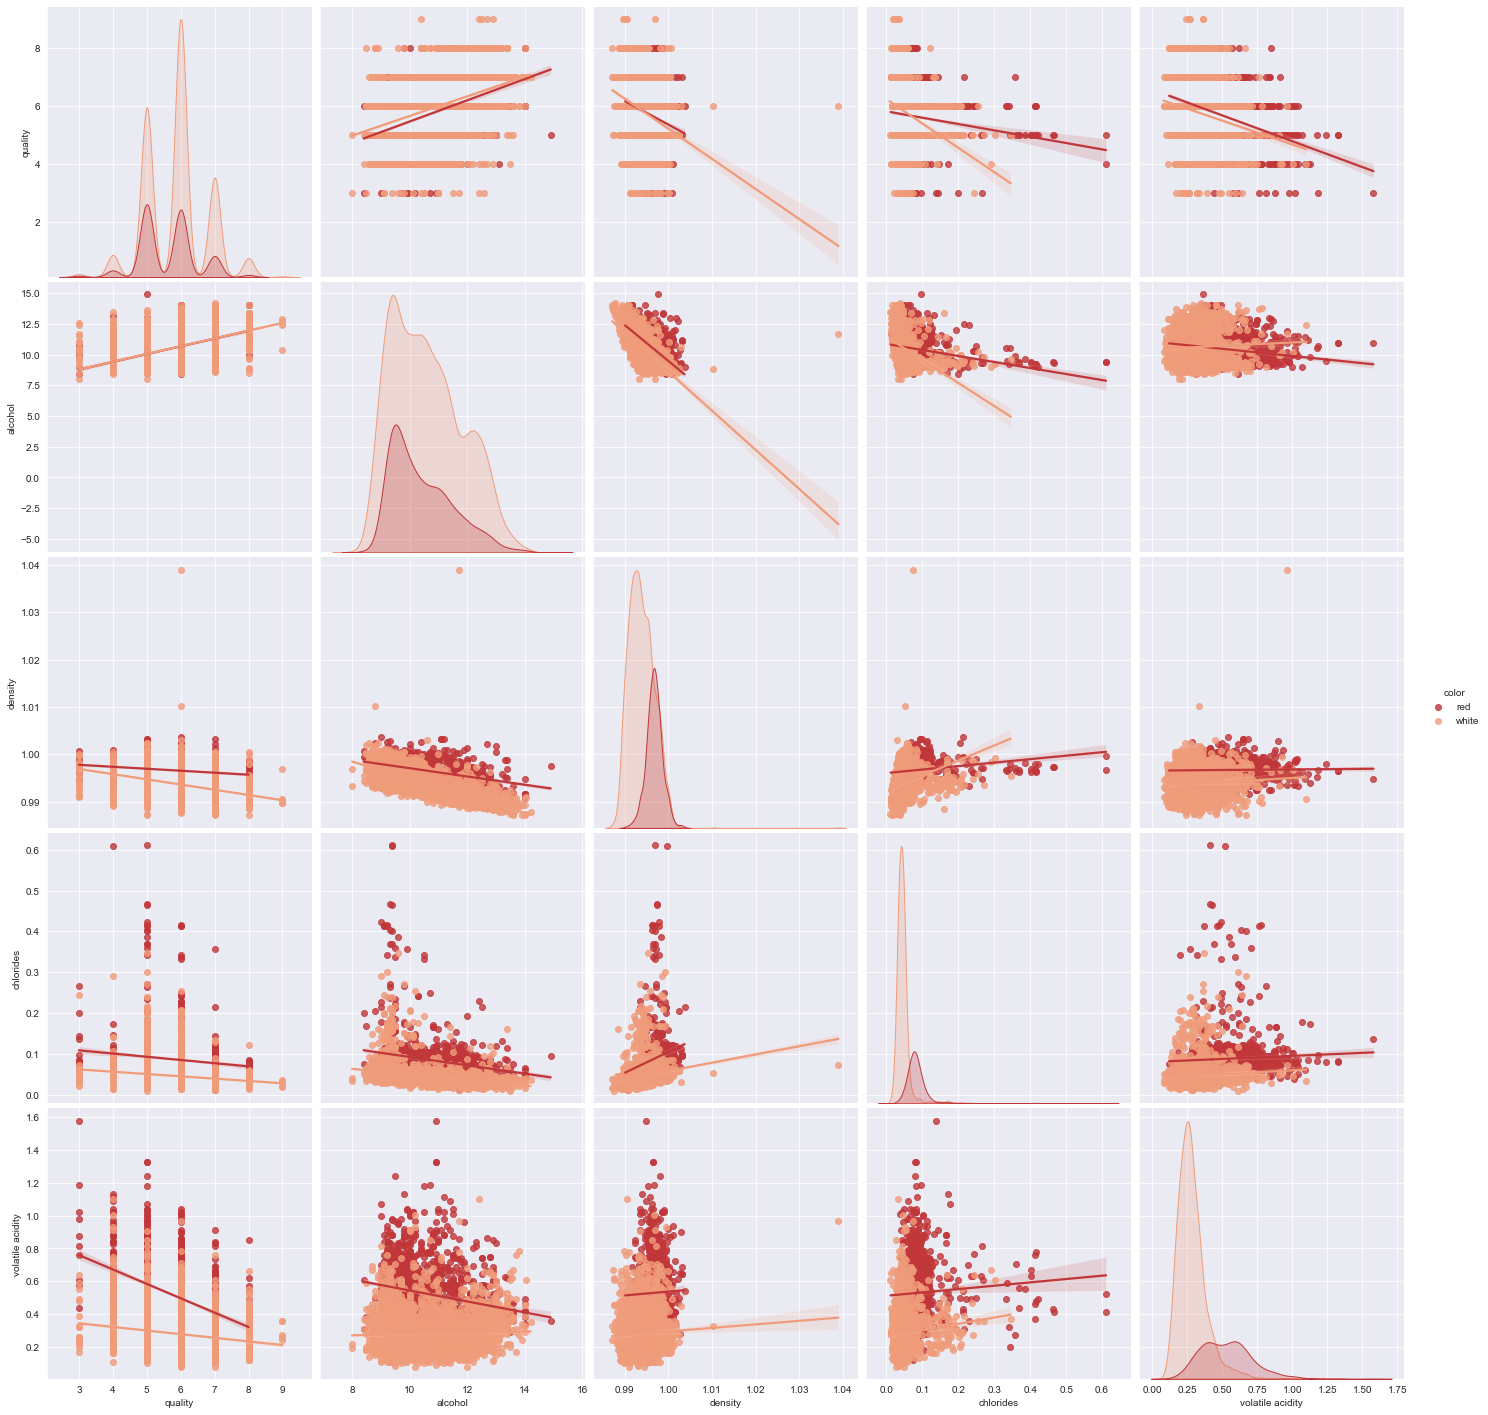

In [18]:

# Gráficos de dispersión de variables correlacionadas con calidad.
#---------------------------------------------------------------------------
sns.pairplot(vinos[['quality','alcohol','density','chlorides','volatile acidity','color']],
             kind='reg',
            hue='color',
            height=4
            )

## 2.3. Creación de una variable binaria para el vino.

Para terminar vamos a crear una variable binaria con valores numéricos asociados a cada clase para que scikit learn pueda hacer la clasificación. Y guardaremos el archivo en un formato pickle.

In [19]:
COLOR_BI={'red':0,'white':1}
vinos['color_bi']=vinos['color'].map(COLOR_BI)

In [20]:
vinos.to_pickle('vinos')

In [21]:
vinos=vinos.drop('color',axis=1)
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_bi
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,1
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,1
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,0
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,1


# 3. Selección de un método de clasificación según el color del vino.

## 3.1. División del conjunto de datos en train y test.

Poder evaluar el grado de desmpeño de un modelo necesitamos disponer de un conjunto de datos de los que conozcamos su target y que el modelo no haya visto anteriormente. Para ello, dividimos aleatoriamente el dataset en dos conjuntos, uno de entrenamiento + validación (vamos a emplear tecnicas de validación cruzada) y otro de test en nua proporción 80/20.

La librería scikit learn nos ofrece una función para llevar a cabo esta división.

In [22]:
# División aleatoria train+test con semilla = 1978
#---------------------------------------------------------------------------
train_vinos, test_vinos = train_test_split(vinos, train_size=0.8, test_size=0.2, random_state=1978)


Compruebo ahora que la distribución de clases en el dataset de entrenamiento es igual a la original.

In [23]:
train_vinos['color_bi'].value_counts(normalize=True)

1    0.746476
0    0.253524
Name: color_bi, dtype: float64

In [24]:
vinos['color_bi'].value_counts(normalize=True)

1    0.744549
0    0.255451
Name: color_bi, dtype: float64


 
Como tenemos un dataset desbalanceado voy a emplear como métrica principal **el área bajo la curva ROC (AUC)**.

Solo me queda dividir el datasat de train en features y target.


In [25]:
features=train_vinos.columns[0:12]
y_train=train_vinos['color_bi']
X_train=train_vinos[features]

## 3.2. Entrenamiento de modelos de clasificación.

Para entrenar los modelos voy a utilizar **validación cruzada con 10 rondas** y para el ajuste de los hiperparámetros voy a emplear el método **grid search**. 

Scikit Learn permite hacer esto con una única función **GridSearchCV**. El flujo de trabajo será el siguiente:
1. Pipeline con preproceso de los datos y modelo.
2. Grid de hiperparámetros del modelo.
3. Entrenamiento del modelo.

Una vez terminado el entrenamiento de los modelos escogeremos el que haya obtenido mejor métrica y lo entrenaremos una última vez con el conjunto de datos de train completo (durante la validación cruzada solo entrenaba con el 90% de los datos).

Finalmente evaluaremos este modelo comparando como de bien clasifica frente al conjunto de test.

###  3.2.1. Regresión Logística.

El primer modelo que entrenaremos será una regresión logística. La regresión logística funciona mejor cuando los datos están tienen ordenes de magnitud similares, para ello vamos a estandarizarlos utilizando el comando StandardScaler.

In [26]:

# 1. Pipeline regresión logística
PIP_rlogistica=Pipeline(steps=[('Standard',StandardScaler()),
                                ('logreg',LogisticRegression())
                              ])

# 2. Selección de hiperparámetros
HYP_rlogistica={}

# 3. Grid search
GS_rlogistica=GridSearchCV(PIP_rlogistica,
                           HYP_rlogistica,
                           cv=10,
                           scoring='roc_auc')


In [27]:
GS_rlogistica.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={}, scoring='roc_auc')

In [28]:
GS_rlogistica.best_score_

0.9941124097578982

### 3.2.2. K-Nearest Neigbours. 

Clasificador K vecinos cercanos.

In [33]:
# 1. Pipeline clasificación Knn
PIP_knn=Pipeline(steps=[('Standard',StandardScaler()),
                        ('knn',KNeighborsClassifier())
                              ])

# 2. Selección de hiperparámetros
HYP_knn={'knn__n_neighbors':[1,3,5,11,13,15,17,25,35,71]}

# 3. Grid search
GS_knn=GridSearchCV(PIP_knn,
                    HYP_knn,
                    cv=10,
                    scoring='roc_auc')


In [34]:
GS_knn.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 11, 13, 15, 17, 25, 35,
                                              71]},
             scoring='roc_auc')

In [35]:
GS_knn.best_score_

0.9958123694277156

In [36]:
GS_knn.best_params_

{'knn__n_neighbors': 13}

### 3.2.3. Bagging con clasificador KNN (13 vecinos).

Vamos a probar un ensemble con el algoritmo knn de 13 vecinos. En concreto vamos a probar un **bagging**. 

En el bagging entrenamos el mismo modelo un número de veces determinado (n_estimators) pero cada modelo lo hará con un subcojunto diferente de los datos (max_samples y max_features). Cada modelo generará una predicción y la predicción final del bagging será la mayoría ganadora.

In [39]:
# 1. Pipeline Bagging con Knn clasificador.
PIP_bgknn=Pipeline(steps=[('Standard',StandardScaler()),
                       ('bgknn',BaggingClassifier(KNeighborsClassifier(n_neighbors=13),bootstrap=True))])

# 2. Selección de hiperparámetros
HYP_bgknn={'bgknn__max_samples':[0.25,0.5,0.75],
           'bgknn__max_features':[1,3,5,7],
           'bgknn__n_estimators':[25,50,175,200]}


# 3. Grid search
GS_bgknn=GridSearchCV(PIP_bgknn,
                      HYP_bgknn,
                      cv=10,
                      scoring='roc_auc',
                      verbose=True,
                      n_jobs=-1)


In [40]:
GS_bgknn.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.0min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('bgknn',
                                        BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=13)))]),
             n_jobs=-1,
             param_grid={'bgknn__max_features': [1, 3, 5, 7],
                         'bgknn__max_samples': [0.25, 0.5, 0.75],
                         'bgknn__n_estimators': [25, 50, 175, 200]},
             scoring='roc_auc', verbose=True)

In [41]:
GS_bgknn.best_score_

0.9972257058266137

In [42]:
GS_bgknn.best_params_

{'bgknn__max_features': 3,
 'bgknn__max_samples': 0.75,
 'bgknn__n_estimators': 175}

### 3.2.4. Árbol de decisión.

Pasamos ahora a un modelo sencillo, pero que suele dar buenos resultados, el árbol de decisión.

In [43]:
# 1. Pipeline arbol de decisión
PIP_arbol=Pipeline(steps=[('arbol',DecisionTreeClassifier())
                              ])

# 2. Selección de hiperparámetros
HYP_arbol={'arbol__max_depth':[1,2,3,4,5,6,7,9,10,20,None],
           'arbol__max_features':[1,3,5,'auto']}

# 3. Grid search
GS_arbol=GridSearchCV(PIP_arbol,
                    HYP_arbol,
                    cv=10,
                    scoring='roc_auc',
                    verbose=True,
                    n_jobs=-1)


In [44]:
GS_arbol.fit(X_train,y_train)

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    1.9s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('arbol', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'arbol__max_depth': [1, 2, 3, 4, 5, 6, 7, 9, 10, 20,
                                              None],
                         'arbol__max_features': [1, 3, 5, 'auto']},
             scoring='roc_auc', verbose=True)

In [45]:
GS_arbol.best_score_

0.9810454600750077

In [46]:
GS_arbol.best_params_

{'arbol__max_depth': 4, 'arbol__max_features': 5}

### 3.2.5. Clasificador Naive Bayes.

Clasificador Naive Bayes.

In [47]:
# 1. Pipeline clasificador Naive Bayes
PIP_nb=Pipeline(steps=[('Standard',StandardScaler()),
                       ('nb',GaussianNB())
                              ])

# 2. Selección de hiperparámetros
HYP_nb={}

# 3. Grid search
GS_nb=GridSearchCV(PIP_nb,
                    HYP_nb,
                    cv=10,
                    scoring='roc_auc')


In [48]:
GS_nb.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={}, scoring='roc_auc')

In [49]:
GS_nb.best_score_

0.9850197602890107

### 3.2.6. AdaBoosting con Naive Bayes.

Vamos aprobar de nuevo un ensemble con el clasificador Naive Bayes. En este caso quiero ver como mejora el modelo con una técnica de boosting, para lo que utilizaremos un algoritmo de adaptative boosting (AdaBoosting).

El boosting es una técnica aditiva donde cada modelo intenta mejorar al anterior. En el adaptative boosting, cada modelo intenta disminuir los errores que cometió el modelo anterior.

In [50]:
# 1. Pipeline AdaBoosting para arbol de decisión
PIP_adaB=Pipeline(steps=[('Standard',StandardScaler()),
                       ('adaB',AdaBoostClassifier(base_estimator=GaussianNB()))
                              ])

# 2. Selección de hiperparámetros
HYP_adaB={'adaB__n_estimators':[10,25,50,100,200],
          'adaB__learning_rate':[0.01,0.05,0.1,0.5,0.8,1]}

# 3. Grid search

GS_adaB=GridSearchCV(PIP_adaB,
                    HYP_adaB,
                    cv=10,
                    scoring='roc_auc',
                    verbose=True,
                    n_jobs=-1)


In [51]:
GS_adaB.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.7s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('adaB',
                                        AdaBoostClassifier(base_estimator=GaussianNB()))]),
             n_jobs=-1,
             param_grid={'adaB__learning_rate': [0.01, 0.05, 0.1, 0.5, 0.8, 1],
                         'adaB__n_estimators': [10, 25, 50, 100, 200]},
             scoring='roc_auc', verbose=True)

In [52]:
GS_adaB.best_score_

0.9945534646684037

In [53]:
GS_adaB.best_params_

{'adaB__learning_rate': 0.5, 'adaB__n_estimators': 200}

### 3.2.7. Support Vector Machine. 

Otro modelo que vamos a probar es un clasificador tipo **support vector machine**. Este algoritmo es muy buen clasificador pero tiene el inconveniente de ser muy lento. Vamos a utilizar un SVM con RBF Kernel (Radial Basis Function).  

In [54]:
# 1. Pipeline Support Vector Machine
PIP_svm=Pipeline(steps=[('Standard',StandardScaler()),
                       ('svm',SVC(class_weight='balanced'))
                              ])

# 2. Selección de hiperparámetros
HYP_svm={'svm__C':[0.01,0.1,1,10,100,1000],
        'svm__gamma':[0.001,0.01,0.1,1,10]
        }

# 3. Grid search
GS_svm=GridSearchCV(PIP_svm,
                    HYP_svm,
                    cv=10,
                    scoring='roc_auc',
                   verbose=True,
                   n_jobs=-2)


In [55]:
GS_svm.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   44.1s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard', StandardScaler()),
                                       ('svm', SVC(class_weight='balanced'))]),
             n_jobs=-2,
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='roc_auc', verbose=True)

In [56]:
GS_svm.best_score_

0.9971995044963554

In [57]:
GS_svm.best_params_

{'svm__C': 100, 'svm__gamma': 0.01}

### 3.2.8. Random Forest.

Por último vamos a probar a probar un randomforest. El random forest es una clase especial de bagging compuesto por árboles de decisión.

In [58]:
# 1. Pipeline Random Forest.

PIP_randf=Pipeline(steps=[('randf',RandomForestClassifier())
                              ])

# 2. Selección de hiperparámetros

HYP_randf={'randf__n_estimators':[75,100,125,150],
           'randf__max_depth':[3,5,10,15,25],
           'randf__max_features':[1,2,3,'auto']}

# 3. Grid search

GS_randf=GridSearchCV(PIP_randf,
                    HYP_randf,
                    cv=10,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=True)


In [59]:
GS_randf.fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.1min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randf__max_depth': [3, 5, 10, 15, 25],
                         'randf__max_features': [1, 2, 3, 'auto'],
                         'randf__n_estimators': [75, 100, 125, 150]},
             scoring='roc_auc', verbose=True)

In [62]:
GS_randf.best_score_

0.9980795447227709

In [61]:
GS_randf.best_params_

{'randf__max_depth': 10, 'randf__max_features': 1, 'randf__n_estimators': 125}

## 3.3. Selección del mejor modelo.


Una vez entrenados los modelos comparo los valores del AUC obtenido.

In [63]:
#Creo diccionario con parámetros de los modelos
resultados={'Reg_Logistica':[GS_rlogistica.best_score_,GS_rlogistica.best_estimator_],
            'Knn':[GS_knn.best_score_,GS_knn.best_estimator_],
            'Bagging_Knn':[GS_bgknn.best_score_,GS_bgknn.best_estimator_],
            'Arbol':[GS_arbol.best_score_,GS_arbol.best_estimator_],
            'AdaBoosting_Arbol':[GS_adaB.best_score_,GS_adaB.best_estimator_],
            'Naive_Bayes':[GS_nb.best_score_,GS_nb.best_estimator_],
            'SVM':[GS_svm.best_score_,GS_svm.best_estimator_],
            'Random_forest':[GS_randf.best_score_,GS_randf.best_estimator_]}

In [64]:
modelos=pd.DataFrame.from_dict(resultados, orient='index').rename(columns={0:'AUC',1:'Estimator'})
modelos.sort_values('AUC',ascending=False)

,AUC,Estimator
Random_forest,0.998080,"((DecisionTreeClassifier(max_depth=10, max_fea..."
Bagging_Knn,0.997226,"(StandardScaler(), (KNeighborsClassifier(n_nei..."
SVM,0.997200,"(StandardScaler(), SVC(C=100, class_weight='ba..."
Knn,0.995812,"(StandardScaler(), KNeighborsClassifier(n_neig..."
AdaBoosting_Arbol,0.994553,"(StandardScaler(), (GaussianNB(), GaussianNB()..."
Reg_Logistica,0.994112,"(StandardScaler(), LogisticRegression())"
Naive_Bayes,0.985020,"(StandardScaler(), GaussianNB())"
Arbol,0.981045,"(DecisionTreeClassifier(max_depth=4, max_featu..."


In [65]:
print('El mejor modelo es:\n\n', modelos[modelos['AUC']==modelos['AUC'].max()].iloc[0][1],'\n', 
      ' \n con un valor de AUC de: ', modelos.loc[modelos['AUC']==modelos['AUC'].max()].iloc[0][0])

El mejor modelo es:

 Pipeline(steps=[('randf',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=125))]) 
  
 con un valor de AUC de:  0.9980795447227709


In [66]:
modelo_clasificacion=GS_randf.best_estimator_

In [67]:
modelo_clasificacion.fit(X_train,y_train)

Pipeline(steps=[('randf',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=125))])

Y guardo el modelo en un archivo binario.

In [68]:
with open('clasificador_vinos.model','wb') as archivo:
        pickle.dump(modelo_clasificacion,archivo)


## 3.4. Evaluación con el conjunto de test.

Vamos a comprobar como de bien clasifica el modelo sobre un conjunto de datos que no había visto antes.

In [75]:
# Predicción clases de vino en el conjunto de test con el modelo ganador. 
#---------------------------------------------------------------------------
y_test_pred=modelo_clasificacion.predict(test_vinos[features])


# Valores reales de las clases de vino en el conjunto de test.
#---------------------------------------------------------------------------
y_test_reales=test_vinos['color_bi']


In [76]:
# Evaluación de AUC en el conjunto de test.
#---------------------------------------------------------------------------
AUC_test = roc_auc_score(y_true = y_test_reales,
                         y_score = y_test_pred)
                                 

print("El modelo tiene un AUC en el conjunto de test de %s" % AUC_test)



El modelo tiene un AUC en el conjunto de test de 0.9928571428571429


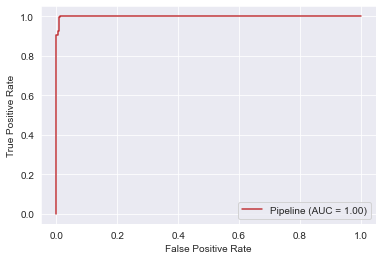

In [72]:
plot_roc_curve(estimator=modelo_clasificacion, 
               X=test_vinos[features], 
               y=test_vinos['color_bi'],)

In [77]:
confusion_matrix(y_true=y_test_reales,
                 y_pred=y_test_pred)

array([[276,   4],
       [  0, 784]], dtype=int64)

In [78]:
print(classification_report(y_true=y_test_reales,
                            y_pred=y_test_pred,
                            digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9857    0.9928       280
           1     0.9949    1.0000    0.9975       784

    accuracy                         0.9962      1064
   macro avg     0.9975    0.9929    0.9951      1064
weighted avg     0.9963    0.9962    0.9962      1064



Como podemos comprobar en la matriz de confusión, en el conjunto de test había 280 vinos tintos y el modelo acertó en 276 ocasiones y para vinos blancos el modelo acerto 784 de 784 registros. 

# 4. Predicción de la calidad de un vino (regresión).

En el siguiente apartado vamos a buscar un modelo que nos permita predecir el valor de la variable calidad en función del resto de variables de la observación. Este es un caso de regresión donde tendremos que predecir el valor de una variable numérica. 

## 4.1. Carga del archivo y limpieza de datos.

Cargamos el dataset de nuevo para inicar el ejercicio de regresión y eliminamos las observaciones duplicadas.

In [79]:
calidad=pd.read_csv(ARCHIVO,sep=';')
calidad.drop_duplicates(inplace=True,ignore_index=True)

## 4.2. Análisis exploratorio.

Para ver como se distribuyen las diferentes variables en función de la calidad usaremos un gráfico de violín con las distribuciones separadas por clase de vino.

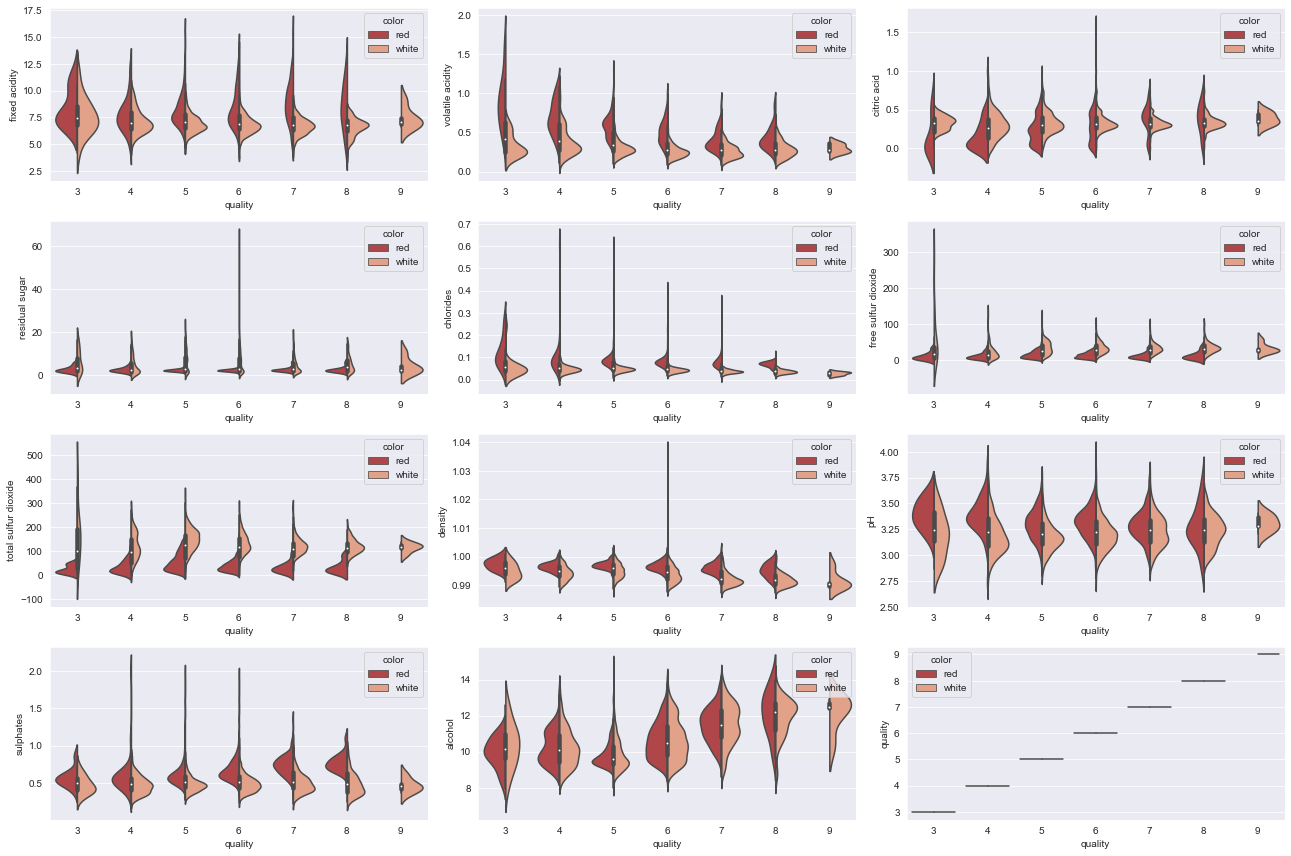

In [82]:
# Gráfico de violín de las diferentes variables por valor de calidad y tipo de vino
#----------------------------------------------------------------------------------
filas=4
columnas=3
fig, axes = plt.subplots(filas, columnas, figsize=(18, 12),tight_layout=True)
sns.set_palette('RdGy')

for i in range(filas):
    for j in range(columnas):
        var=(+j)+(i*columnas)
        sns.violinplot(ax=axes[i, j], 
                    data=calidad, 
                    x='quality', 
                    y=calidad.columns[var],
                    hue='color',
                    split=True)

Y para finalizar la exploración de los datos, veremos la distribución de los vinos según la calidad. 

<AxesSubplot:xlabel='quality', ylabel='count'>

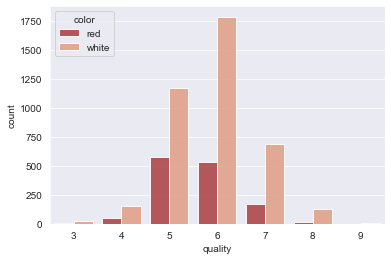

In [83]:
sns.countplot(data=calidad,
            x='quality',
            hue="color",
            alpha=.9
           )

Como se aprecia la mayoría de los vinos tiene una calidad entre 5 y 7 puntos y los vinos blancos tienen tendencia a obtener puntuaciones más altas.

Por último, antes de hacer la regresión crearemos una variable binaria para el color.

In [85]:
COLOR_BI={'red':0,'white':1}
calidad['color_bi']=calidad['color'].map(COLOR_BI)

## 4.3. División del conjunto de datos en train y test.

Igual que en el ejercicio de clasificación, para entrenar un modelo de regresión también divido el conjunto de datos en dos.

In [86]:
train_calidad, test_calidad = train_test_split(calidad, train_size=0.8, test_size=0.2, random_state=2020)

In [87]:
train_calidad.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_bi
2481,8.1,0.28,0.49,1.00,0.040,32.0,148.0,0.99360,3.13,0.41,10.0,6,white,1
936,6.3,0.22,0.57,1.40,0.208,14.0,96.0,0.99320,3.16,0.43,10.0,6,white,1
5059,7.3,0.27,0.39,6.70,0.064,28.0,188.0,0.99580,3.29,0.30,9.7,5,white,1
3414,6.8,0.23,0.31,2.80,0.047,40.0,122.0,0.99126,3.06,0.64,10.9,7,white,1
2758,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,red,0


In [88]:
train_calidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 2481 to 864
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4256 non-null   float64
 1   volatile acidity      4256 non-null   float64
 2   citric acid           4256 non-null   float64
 3   residual sugar        4256 non-null   float64
 4   chlorides             4256 non-null   float64
 5   free sulfur dioxide   4256 non-null   float64
 6   total sulfur dioxide  4256 non-null   float64
 7   density               4256 non-null   float64
 8   pH                    4256 non-null   float64
 9   sulphates             4256 non-null   float64
 10  alcohol               4256 non-null   float64
 11  quality               4256 non-null   int64  
 12  color                 4256 non-null   object 
 13  color_bi              4256 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 498.8+ KB


In [89]:
calidad['quality'].describe()

count    5320.000000
mean        5.795677
std         0.879772
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [90]:
train_calidad['quality'].describe()

count    4256.000000
mean        5.804981
std         0.879608
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Como se aprecia, las distribuciones de la variable objetivo son similares en el conjunto de datos total y en el de train.

In [91]:
# Separo las features del target
ycal_train=train_calidad['quality']
Xcal_train=train_calidad.drop(['quality','color'],axis=1)

Una vez que tengo dividido el conjunto de datos en train y test empiezo a probar modelos. 

## 4.4. Entrenamiento de modelos de regresión.

Igual que para el caso anterior, voy a utilizar **validación cruzada con 10 rondas** y el método **grid search** para buscar los mejores hiperparámetros. 

Para medir el desmpeño de los modelos de regresión emplearé como métrica el **RMSE** (raíz media de los errores al cuadrado).

Una vez terminado el entrenamiento de los modelos escogeremos el que haya obtenido mejor métrica y lo entrenaremos una última vez con el conjunto de datos de train completo (durante la validación cruzada solo entrenba con el 90% de los datos).

Finalmente evaluaremos este modelo comparando como de bien ajusta las predicciones frente al conjunto de test.

### 4.4.1. Regresión lineal.

El primer modelo que vamosa probar es una regresión lineal multivariable.

In [92]:
# 1. Pipeline regresión lineal múltiple
PIP_linear=Pipeline(steps=[
                        ('preprocesado',StandardScaler()),
                        ('linear',LinearRegression(fit_intercept=True))
                              ])

# 2. Selección de hiperparámetros

HYP_linear={}

# 3. Grid search

GS_linear=GridSearchCV(PIP_linear,
                    HYP_linear,
                    cv=10,
                    scoring='neg_root_mean_squared_error')


In [93]:
GS_linear.fit(Xcal_train,ycal_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesado', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={}, scoring='neg_root_mean_squared_error')

In [94]:
GS_linear.best_score_

-0.7327448986472818

In [95]:
GS_linear.best_params_

{}

###  4.4.2. Regresión lineal con regularización Ridge 

Vamos a probar una regularización ridge.

In [96]:
# 1. Pipeline regresión lineal múltiple
PIP_ridge=Pipeline(steps=[
                        ('preprocesado',StandardScaler()),
                        ('ridge',Ridge(fit_intercept =True))
                              ])

# 2. Selección de hiperparámetros
HYP_ridge={'ridge__alpha': np.arange(1, 50)}

# 3. Grid search
GS_ridge=GridSearchCV(PIP_ridge,
                    HYP_ridge,
                    cv=10,
                    scoring='neg_root_mean_squared_error')


In [97]:
GS_ridge.fit(Xcal_train,ycal_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesado', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_root_mean_squared_error')

In [98]:
GS_ridge.best_score_

-0.7324384853110903

In [99]:
GS_ridge.best_params_

{'ridge__alpha': 42}

###  4.4.3. Regresión lineal con regularización Lasso. 

Regularización Lasso

In [104]:
# 1. Pipeline regresión lineal LASSO.

PIP_lasso=Pipeline(steps=[
                        ('preprocesado',StandardScaler()),
                        ('lasso',Lasso(fit_intercept =True))
                              ])

# 2. Selección de hiperparámetros

HYP_lasso={'lasso__alpha': np.linspace(0.001, 100, 25)}

# 3. Grid search

GS_lasso=GridSearchCV(PIP_lasso,
                    HYP_lasso,
                    cv=10,
                    scoring='neg_root_mean_squared_error')


In [105]:
GS_lasso.fit(Xcal_train,ycal_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesado', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.0000000e-03, 4.1676250e+00, 8.3342500e+00, 1.2500875e+01,
       1.6667500e+01, 2.0834125e+01, 2.5000750e+01, 2.9167375e+01,
       3.3334000e+01, 3.7500625e+01, 4.1667250e+01, 4.5833875e+01,
       5.0000500e+01, 5.4167125e+01, 5.8333750e+01, 6.2500375e+01,
       6.6667000e+01, 7.0833625e+01, 7.5000250e+01, 7.9166875e+01,
       8.3333500e+01, 8.7500125e+01, 9.1666750e+01, 9.5833375e+01,
       1.0000000e+02])},
             scoring='neg_root_mean_squared_error')

In [106]:
GS_lasso.best_score_

-0.7326526053385936

In [107]:
GS_lasso.best_params_

{'lasso__alpha': 0.001}

### 4.4.4. Regresión polinómica.

La regresión lineal y sus regularizaciones dan valores muy parecidos, probemos ahora conuna regresión polinómica.

In [110]:
# 1. Pipeline regresión lineal LASSO.

PIP_poli=Pipeline(steps=[
                        ('polinomio',PolynomialFeatures()),
                        ('preprocesado',StandardScaler()),
                        ('modelo',LinearRegression())
                              ])

# 2. Selección de hiperparámetros

HYP_poli={'polinomio__degree':[1,2,3,4]
          }

# 3. Grid search

GS_poli=GridSearchCV(PIP_poli,
                    HYP_poli,
                    cv=10,
                    scoring='neg_root_mean_squared_error',
                    verbose=True,
                    n_jobs=-1)


In [111]:
GS_poli.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   37.9s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polinomio', PolynomialFeatures()),
                                       ('preprocesado', StandardScaler()),
                                       ('modelo', LinearRegression())]),
             n_jobs=-1, param_grid={'polinomio__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [112]:
GS_poli.best_score_

-0.7317033042485217

In [113]:
GS_poli.best_params_

{'polinomio__degree': 2}

###  4.4.5. Algoritmo KNN regresor

El siguiente candidato es el algoritmo K vecinos cercanos para regresión. 

In [114]:
# 1. Pipeline KNN regresor.
PIP_knnreg=Pipeline(steps=[
                        ('preprocesado',StandardScaler()),
                        ('knn_reg',KNeighborsRegressor())
                              ])

# 2. Selección de hiperparámetros
HYP_knnreg={'knn_reg__n_neighbors': np.arange(3,73,2),
            'knn_reg__weights': ['uniform','distance']}

# 3. Grid search
GS_knnreg=GridSearchCV(PIP_knnreg,
                       HYP_knnreg,
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       verbose=True,
                       n_jobs=-1)


In [115]:
GS_knnreg.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 685 out of 700 | elapsed:   13.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   13.5s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesado', StandardScaler()),
                                       ('knn_reg', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn_reg__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71]),
                         'knn_reg__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error', verbose=True)

In [116]:
GS_knnreg.best_score_

-0.704506130145538

In [117]:
GS_knnreg.best_params_

{'knn_reg__n_neighbors': 21, 'knn_reg__weights': 'distance'}

### 4.4.6. SVM regresor.

Los support vector machine también tienen una versión para regresión. La probamos a continuación.

In [118]:
# 1. Pipeline SVM regresor.
PIP_SVMreg=Pipeline(steps=[
                        ('preprocesado',StandardScaler()),
                        ('SVMreg',SVR())
                              ])

# 2. Selección de hiperparámetros
HYP_SVMreg={'SVMreg__C':[0.001,0.01,0.1,1,10,100],
            'SVMreg__gamma':[0.001,0.01,0.1,0.5,1,10,100]}

# 3. Grid search
GS_SVMreg=GridSearchCV(PIP_SVMreg,
                       HYP_SVMreg,
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       verbose=True,
                       n_jobs=-1)


In [119]:
GS_SVMreg.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  3.5min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesado', StandardScaler()),
                                       ('SVMreg', SVR())]),
             n_jobs=-1,
             param_grid={'SVMreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVMreg__gamma': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [120]:
GS_SVMreg.best_score_

-0.6905635701690394

In [121]:
GS_SVMreg.best_params_

{'SVMreg__C': 1, 'SVMreg__gamma': 0.1}

### 4.4.7. Arbol de decisión regresor.

Arbol de decisión regresor.

In [125]:
# 1. Pipeline árbol de decisión regresor.

PIP_arbolreg=Pipeline(steps=[
                        ('arbolreg',DecisionTreeRegressor())
                              ])

# 2. Selección de hiperparámetros

HYP_arbolreg={'arbolreg__max_depth':[3,4,5,6,7,9,15,25,30,50],
              'arbolreg__max_features':['auto','sqrt',1,7]}

# 3. Grid search

GS_arbolreg=GridSearchCV(PIP_arbolreg,
                       HYP_arbolreg,
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       verbose=True,
                       n_jobs=-1)


In [126]:
GS_arbolreg.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('arbolreg', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'arbolreg__max_depth': [3, 4, 5, 6, 7, 9, 15, 25, 30,
                                                 50],
                         'arbolreg__max_features': ['auto', 'sqrt', 1, 7]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [127]:
GS_arbolreg.best_score_

-0.7494145763919662

In [128]:
GS_arbolreg.best_params_

{'arbolreg__max_depth': 5, 'arbolreg__max_features': 'auto'}

### 4.4.8. Random Forest.

Vamos a probar ahora un ensemble, un random forest regresor.

In [129]:
# 1. Pipeline randomforest de decisión regresor.
PIP_randfreg=Pipeline(steps=[
                        ('randfreg',RandomForestRegressor())
                              ])

# 2. Selección de hiperparámetros
HYP_randfreg={'randfreg__max_depth':[3,5,25,50,100],
              'randfreg__max_features':['auto',5,3,1],
              'randfreg__n_estimators':[125,150,200,250]
             }

                               
# 3. Grid search
GS_randfreg=GridSearchCV(PIP_randfreg,
                       HYP_randfreg,
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       verbose=True,
                       n_jobs=-1)


In [130]:
GS_randfreg.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.2min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randfreg', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randfreg__max_depth': [3, 5, 25, 50, 100],
                         'randfreg__max_features': ['auto', 5, 3, 1],
                         'randfreg__n_estimators': [125, 150, 200, 250]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [131]:
GS_randfreg.best_score_

-0.6784656370757606

In [132]:
GS_randfreg.best_params_

{'randfreg__max_depth': 50,
 'randfreg__max_features': 3,
 'randfreg__n_estimators': 250}

###  4.4.9. Gradient Boosting Regresor

Por último vamos a probar un algoritmo de gradient boosting.

In [138]:
# 1. Pipeline randomforest de decisión regresor.
PIP_gbr=Pipeline(steps=[
                        ('gbr',GradientBoostingRegressor())
                              ])

# 2. Selección de hiperparámetros
HYP_gbr= {'gbr__learning_rate': [0.05, 0.1, 0.5],
          'gbr__n_estimators': [100,150,250],
          'gbr__max_depth': [3,4,5,6],
          'gbr__subsample': [1.0, 0.75, 0.5],
          'gbr__max_features': [4,5,6]
         }

                              
# 3. Grid search
GS_gbr=GridSearchCV(PIP_gbr,
                       HYP_gbr,
                       cv=10,
                       scoring='neg_root_mean_squared_error',
                       verbose=True,
                       n_jobs=-1)


In [139]:
GS_gbr.fit(Xcal_train,ycal_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 12.2min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gbr', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gbr__learning_rate': [0.05, 0.1, 0.5],
                         'gbr__max_depth': [3, 4, 5, 6],
                         'gbr__max_features': [4, 5, 6],
                         'gbr__n_estimators': [100, 150, 250],
                         'gbr__subsample': [1.0, 0.75, 0.5]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [136]:
GS_gbr.best_score_

-0.6837668529293183

In [137]:
GS_gbr.best_params_


{'gbr__learning_rate': 0.05,
 'gbr__max_depth': 5,
 'gbr__max_features': 5,
 'gbr__n_estimators': 150,
 'gbr__subsample': 0.75}

## 4.5. Selección del mejor modelo de regresión.

Ahora comparo los valores de RMSE que obtengo con cada método y me quedo con el que me da mejores resultados.

In [140]:
#Creo diccionario con parámetros de los modelos
resultados_reg={'lineal':[GS_linear.best_score_,GS_linear.best_estimator_],
            'Ridge':[GS_ridge.best_score_,GS_ridge.best_estimator_],
            'Lasso':[GS_lasso.best_score_,GS_lasso.best_estimator_],
            'Polinomica':[GS_poli.best_score_,GS_poli.best_estimator_],
            'KNN reg.':[GS_knnreg.best_score_,GS_knnreg.best_estimator_],
            'SVR reg':[GS_SVMreg.best_score_,GS_SVMreg.best_estimator_],
            'Arbol reg':[GS_arbolreg.best_score_,GS_arbolreg.best_estimator_],
            'Random_forest reg':[GS_randfreg.best_score_,GS_randfreg.best_estimator_],
            'Gradient Boost Regresor':[GS_gbr.best_score_,GS_gbr.best_estimator_]}

In [141]:
modelos_reg=pd.DataFrame.from_dict(resultados_reg, orient='index').rename(columns={0:'RMSE',1:'Estimator'})
modelos_reg.sort_values('RMSE',ascending=False)

,RMSE,Estimator
Random_forest reg,-0.678466,"((DecisionTreeRegressor(max_depth=50, max_feat..."
Gradient Boost Regresor,-0.682361,(([DecisionTreeRegressor(criterion='friedman_m...
SVR reg,-0.690564,"(StandardScaler(), SVR(C=1, gamma=0.1))"
KNN reg.,-0.704506,"(StandardScaler(), KNeighborsRegressor(n_neigh..."
Polinomica,-0.731703,"(PolynomialFeatures(), StandardScaler(), Linea..."
Ridge,-0.732438,"(StandardScaler(), Ridge(alpha=42))"
Lasso,-0.732653,"(StandardScaler(), Lasso(alpha=0.001))"
lineal,-0.732745,"(StandardScaler(), LinearRegression())"
Arbol reg,-0.749415,"(DecisionTreeRegressor(max_depth=5, max_featur..."


In [142]:
print('El mejor modelo es:\n\n', modelos_reg[modelos_reg['RMSE']==modelos_reg['RMSE'].max()].iloc[0][1],'\n',
      ' \n con un valor de AUC de: ', modelos_reg[modelos_reg['RMSE']==modelos_reg['RMSE'].max()].iloc[0][0])


El mejor modelo es:

 Pipeline(steps=[('randfreg',
                 RandomForestRegressor(max_depth=50, max_features=3,
                                       n_estimators=250))]) 
  
 con un valor de AUC de:  -0.6784656370757606


In [143]:
modelo_regresion=GS_randfreg.best_estimator_

In [144]:
modelo_regresion.fit(Xcal_train,ycal_train)

Pipeline(steps=[('randfreg',
                 RandomForestRegressor(max_depth=50, max_features=3,
                                       n_estimators=250))])

Y guardo el modelo en un archivo binario.


In [145]:
with open('regresion_vinos.model','wb') as archivo:
        pickle.dump(modelo_regresion,archivo)

## 4.6. Evaluación con el conjunto de test.

Vamos a comprobar como se comporta el modelo con un conjunto de datos que no había visto antes.

In [146]:

# Predicción calidad del vino en el conjunto de test con el modelo ganador. 
#---------------------------------------------------------------------------
ycal_test_pred=modelo_regresion.predict(test_calidad.drop(['quality','color'],axis=1))


# Valores reales de las clases de vino en el conjunto de test.
#---------------------------------------------------------------------------
ycal_test_reales=test_calidad['quality']


# Evaluación del RMSE y el MAE con el conjunto de test.
#---------------------------------------------------------------------------

RMSE=mean_squared_error(y_true=ycal_test_reales,
                   y_pred=ycal_test_pred,
                   squared=False)

MAE= mean_absolute_error(y_true=ycal_test_reales,
                   y_pred=ycal_test_pred)


maxerror=max_error(y_true=ycal_test_reales,
                   y_pred=ycal_test_pred)

print('El modelo tiene un RMSE en el conjunto de test de %s' % RMSE)

print('\nEl modelo tiene un MAE en el conjunto de test de %s' % MAE)

print('\nEl modelo tiene un Error Máximo en el conjunto de test de %s' % maxerror)

El modelo tiene un RMSE en el conjunto de test de 0.6965037931228992

El modelo tiene un MAE en el conjunto de test de 0.5275714285714286

El modelo tiene un Error Máximo en el conjunto de test de 3.324


El valor medio absoluto del error para nuestro modelo es de 0.52, que es algo inferior al 10% del valor de calidad media 5.81. No es un valor muy esperanzador para nuestro algoritmo, vamos a ver un poco más en detalle como predice el modelo.  

Para ello añado una columna nueva a mi conjunto de test con los valores predichos y creo otra columna con la diferencia entre valores de calidad predichos y reales.

In [147]:
# Copia del conjunto de test.
test=test_calidad.copy()

# Columnas nuevas con los valores predichos y la diferencia con los reales.
test['pred']=ycal_test_pred
test['diff_cal']=test['pred']-test['quality']

# Estadísticos principales de las nuevas columnas.
test[['quality','pred','diff_cal']].describe()

,quality,pred,diff_cal
count,1064.000000,1064.000000,1064.000000
mean,5.758459,5.775180,0.016722
std,0.879859,0.512719,0.696630
min,3.000000,4.540000,-2.396000
25%,5.000000,5.352000,-0.413000
50%,6.000000,5.760000,0.092000
75%,6.000000,6.144000,0.392000
max,9.000000,7.320000,3.324000


Mirando el máximo y mínimo de las calidades predichas por el algoritmo, da la sensación que el algoritmo tiende a sobre puntuar vinos con calidad baja y a puntuar con valores menores a vinos de calidades altas.

<AxesSubplot:ylabel='diff_cal'>

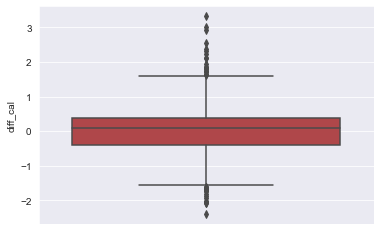

In [148]:
# Boxplot de la distribución de error en el dataset.
#---------------------------------------------------------------------------
sns.boxplot(data=test,y='diff_cal')


Aunque en el 50% de las ocasiones la predicción se desvíe entre -0,4 y 0,4, hay un gran número de predicciones donde la desviación es mucho mayor.

<AxesSubplot:xlabel='quality', ylabel='diff_cal'>

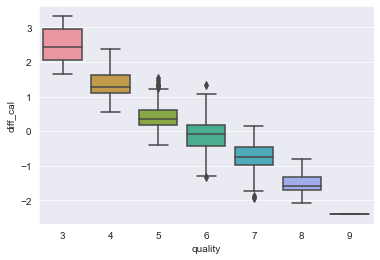

In [149]:
# Distribución de error según valores reales de calidad.
#---------------------------------------------------------------------------
sns.boxplot(data=test,y='diff_cal',x='quality')


<AxesSubplot:xlabel='quality', ylabel='pred'>

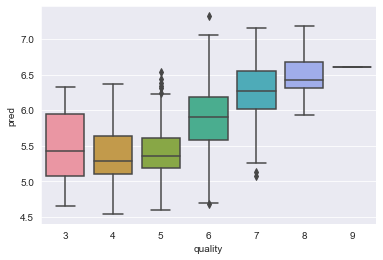

In [150]:
#Valores predichos vs. valores reales.
#---------------------------------------------------------------------------
sns.boxplot(data=test,x='quality',y='pred')


Como habiamos supuesto, el modelo predice más o menos bien cuando la calidad esta en valores intermedios entre 5 y 7 y falla más a valores bajos y altos de calidad. De hecho, para valores bajos tiende a valorar por encima y para calidades  altas el modelo falla por debajo.

## 4.7. Conclusiones.

Hemos desarrollado un modelo para predecir el valor de calidad de un vino que se comporta mejor en un rango de 5 a 7 y que se desvía de una manera más desproporcionada a valores inferiores de 5 y superiores a 7.

In [161]:
ycal_train.value_counts(normalize=True)

6    0.438910
5    0.324248
7    0.163534
4    0.039004
8    0.028195
3    0.005169
9    0.000940
Name: quality, dtype: float64

Precisamente, más del 90% de las observaciones están entre 5 y 7. Por lo que el modelo tiene la oportunidad de aprender más de estas observaciones. Mientras que del resto de valores apenas hay datos.

Por otro lado, en este ejercicio, hemos intentado a partir de un conjunto de parámetros **objetivos**, que tienen que ver con la composición química del vino, predecir el valor de una variable completamente **subjetiva** como es la calidad. 

Teniendo en cuenta ambas consideraciones, probablemente podría funcionar mejor si en vez de una regresión planteásemos un problema de clasificación con tres tipos de vinos según su calidad:
- **Vinos malos.** Con calidades entre 3 y 4.
- **Vinos aceptables.** Con calidades entre 5 y 6.
- **Vinos excelentes.** Con calidades entre 7 y 9.


---------------------------------------------------------------

Realizado por: Julio Abril Cuesta